Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9624 - loss: 0.1268 - val_accuracy: 0.9827 - val_loss: 0.0547
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9866 - loss: 0.0437 - val_accuracy: 0.9876 - val_loss: 0.0381
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.9869 - val_loss: 0.0431
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9904 - val_loss: 0.0297
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9914 - val_loss: 0.0282
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9914 - loss: 0.0282
Test Accuracy: 0.9914000034332275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


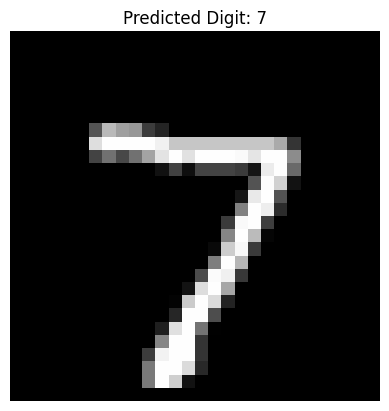

Handwritten Character Recognition Completed


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {model.predict(x_test[:1]).argmax()}")
plt.axis('off')
plt.show()

print("Handwritten Character Recognition Completed")